In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Voting Classifiers 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**hard votiong**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


**soft voting**

In [4]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging and Pasting

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#'bootstrap=True' means that bagging is used
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

**oob score** 

(похоже на использование validation set)

In [6]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42, oob_score=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9253333333333333

92.5% - неплохо. Проверим на тестовом наборе по фану

In [7]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# RandomForest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = rnd_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 95.2%
accuracy score by test set: 91.2%


Теперь почти тоже самое, но используя **BagginClassifier**

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', random_state=42, max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = bag_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 93.87%
accuracy score by test set: 92.0%


Тоже, но с использованием **ExtraTreesClassifier**

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra_clf.fit(X_train, y_train)

y_pred = extra_clf.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score by training set: {:.4}%".format(acc*100))

y_pred = extra_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score by test set: {:.4}%".format(acc*100))

accuracy score by training set: 92.53%
accuracy score by test set: 91.2%


**Feature impotance / Iris dataset**

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


**Feature impotance / MNIST dataset**

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

x_train, x_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], 
                                                    test_size=0.2, random_state=42)

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

y_pred = rnd_clf.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print("accuracy score on training set: {:.4}%".format(acc*100))

y_pred = rnd_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score on test set: {:.4}%".format(acc*100))

accuracy score on training set: 100.0%
accuracy score on test set: 96.73%


(-0.5, 27.5, 27.5, -0.5)

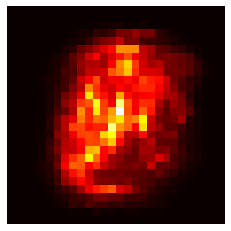

In [14]:
image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
plt.axis("off")

# Hypothesis Boosting 

**AdaBoost**

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

y_pred = ada_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy score on test set: {:.4}%".format(acc*100))

accuracy score on test set: 78.17%


**Gradient Boostring manually**

In [4]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree1.fit(x, y)

residual_errors = y - tree1.predict(x)
tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(x, residual_errors)

residual_errors = residual_errors - tree2.predict(x)
tree3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree3.fit(x, residual_errors)

y_pred = sum(tree.predict(x) for tree in (tree1, tree2, tree3))

print(mean_squared_error(y, y_pred))

0.005038058938993283


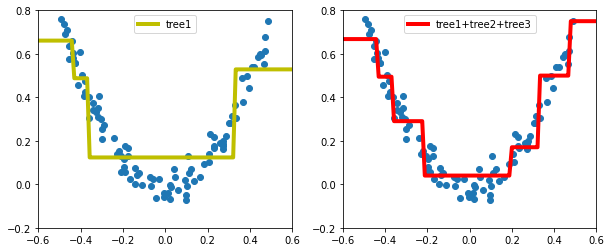

In [18]:
def mplot_graph(x, y, x_train, y_pred, color, label, axis):
    plt.axis([-0.6, 0.6, -0.2, 0.8])
    plt.scatter(x,y)
    plt.plot(x_train, y_pred, c=color, label=label, linewidth=4)
    plt.legend(loc="upper center")


x_new = np.linspace(-0.6, 0.6, 100).reshape(-1,1)
y_new1 = tree1.predict(x_new).reshape(-1,1)
y_new2 = sum(tree.predict(x_new) for tree in (tree1, tree2, tree3)).reshape(-1,1)


axis = np.array([-0.6, 0.6, -0.2, 0.8])
_, axes = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(axes[0])
mplot_graph(x, y, x_new, y_new1, "y", "tree1", axis)
plt.sca(axes[1])
mplot_graph(x, y, x_new, y_new2, "r", "tree1+tree2+tree3", axis)

**Gradient Boostring using Scikit-Learn’s GradientBoostingRegressor**

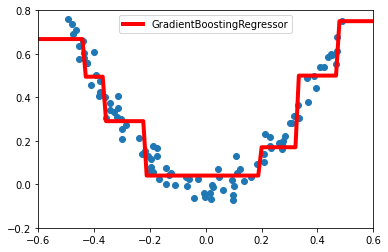

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(x, y)

y_pred = gbrt.predict(x_new)
mplot_graph(x, y, x_new, y_pred, "r", "GradientBoostingRegressor", axis)

**Gradient Boosting with Early stopping**

To verify the best value for hyperparameter 'n_estimators'

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

print("train error:", mean_squared_error(y_train, gbrt.predict(x_train)))
print("val error:", mean_squared_error(y_val, gbrt.predict(x_val)))

train error: 0.00050843992925804
val error: 0.003010263265992808


best n_estimators: 118


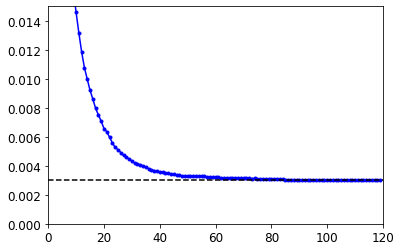

In [38]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1
min_error = np.min(errors)


plt.axis([0, 120, 0., 0.015])
plt.plot(errors, "b.-")
plt.plot([0,120], [min_error,min_error], "k--")


print("best n_estimators:", bst_n_estimators)

**Gradient Boosting with Early stopping**

Early stopping using for estimate best n_estimators during training

In [59]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
   
n_estimators = 150
errors = np.zeros((n_estimators,), dtype=np.float64)
min_error = np.inf
counter = 0;

for i in range(1, n_estimators):
    gbrt.n_estimators = i
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    errors[i-1] = mean_squared_error(y_val, y_pred)
    if (errors[i-1] < min_error):
        min_error = errors[i-1]
        counter = 0
    else:
        counter+=1
        if (counter ==5):
            break   
            
n_estimators = np.argmin(errors) + 1
print("best n_estimators:", n_estimators)

y_pred = gbrt.predict(x_train)
print("error on training set:", mean_squared_error(y_train, y_pred))
y_pred = gbrt.predict(x_val)
print("error on training set:", mean_squared_error(y_val, y_pred))

best n_estimators: 106
error on training set: 0.0005583878965334702
error on training set: 0.003041070343036983


# Tasks


## task 1

**If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?**

Объединение моделей по принципу голосующей системы всегда будет давать лучший результат, чем эти предсказатели по отдельности, при условии, что эти предсказатели, реализованы на различных алгоритмах, т.е. не склонны делать одни и те же ошибки. Будет еще лучше, если предсказатели будут обучаться на различных обучающий наборах.

## task 2

**What is the difference between hard and soft voting classifiers?**

Hard voting - побеждает класс, который набрал мах голосов.
Soft voting - основан на predict_proba, а побеждает тот класс, который получил наибольшую оценку из всех классификаторов.

## task 3

**Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles?**

Baggin от Pasting в вопросе распараллеливания ничем не отличаются и дожлны легко параллелиться как на разных ядрах, так и на разных серверах т.к. каждый предсказатель обучается независимо от других в ассамблеи. Тоже касается RandomForest и Stacking Ensembles, но для последнего главный блендер может быть обучен только на одной машине. Методы Boosting могут работать только последовательно, получая данные от предыдущего предсказателя, поэтмоу распараллелены не могут.

## task 4

**What is the benefit of out-of-bag evaluation?**

Каждый предсказатель оценивается на наборе, который он никогда не видел. Таким образом модель можно оценить без прибегания к оценке на тестовом наборе.

## task 5

**What makes Extra-Trees more random than regular Random Forests? How can this extra randomness help? Are Extra-Trees slower or faster than regular Random Forests?**

Extra-Trees выбирает порог фьючера для разделения случайным образом, поэтому работает быстрее RandomForests, т.к. именно выбор оптимального порогового значения фьючерса занимает основное время в процессе тренировки дерева решений. Как результат больше смещение и, если RandomForest переобучен, Extra-Trees может показать лучший результат. Однако при принятии решений Extra-Trees работает так же как и RandomForests.

## task 6

**If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?**

If your AdaBoost ensemble underfits the training data, you can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimator. You may also try slightly increasing the learning rate.

## task 7

**If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?**

If your Gradient Boosting ensemble overfits the training set, you should try decreasing the learning rate. You could also use early stopping to find the right number of predictors (you probably have too many).

## task 8

**Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM. Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?**

1. Получим данные набора MNIST и разделим на соответсвующие наборы

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache=True, version=1)

In [4]:
x,y = mnist['data'], mnist['target'].astype(int)
x_train, x_val, x_test = x[:50000], x[50000:60000], x[60000:]
y_train, y_val, y_test = y[:50000], y[50000:60000], y[60000:]

2. Созданим предсказатели, кот. будут входить в ассамбль

In [23]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#LinearSVC doen't contain predict_proba. If it's nessesary using predict_proba than use SVC with probability=True
svc    = LinearSVC(random_state=42) 
forest = RandomForestClassifier(random_state=42, n_jobs=-1)
extra  = ExtraTreesClassifier(random_state=42, n_jobs=-1)
voting = VotingClassifier(estimators=[('svc', svc), ('forest', forest), 
                                          ('extra', extra)], voting='hard', n_jobs=-1)

3.1. Выведем точность для validation set для hard voting

In [24]:
voting.fit(x_train, y_train)
for estimator in voting.estimators_:
    y_pred = estimator.predict(x_val)
    score = accuracy_score(y_val, y_pred) * 100
    print("{} accuracy: {:.4}%".format(estimator.__class__.__name__, score))

LinearSVC accuracy: 85.15%
RandomForestClassifier accuracy: 97.36%
ExtraTreesClassifier accuracy: 97.43%


In [25]:
y_pred = voting.predict(x_val)
score = accuracy_score(y_val, y_pred) * 100
print("{} accuracy: {:.4}%".format(voting.__class__.__name__, score))

VotingClassifier accuracy: 97.4%


LinearSVC Показывает низкую точность. Удалим его из ассамблеи 

In [32]:
del voting.estimators_[0]

In [40]:
y_pred = voting.predict(x_val)
score = accuracy_score(y_val, y_pred) * 100
print("{} accuracy: {:.4}%".format(voting.__class__.__name__, score))

VotingClassifier accuracy: 97.35%


Зря убрал LinerSVM, вернем обратно

In [52]:
svc.fit(x_train, y_train)
voting.estimators_.append(svc)
y_pred = voting.predict(x_val)
score = accuracy_score(y_val, y_pred) * 100
print("{} accuracy: {:.4}%".format(voting.__class__.__name__, score))

/home/infodba/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier accuracy: 97.4%


3.2. Выведем точность для validation set для soft voting

Т.к. LinerSVC (в отличие от SVC) не содержит predict_proba его придется удалить.

In [55]:
del voting.estimators_[2]

RandomForestClassifier
ExtraTreesClassifier


In [56]:
voting.voting = "soft"
y_pred = voting.predict(x_val)
score = accuracy_score(y_val, y_pred) * 100
print("{} accuracy: {:.4}%".format(voting.__class__.__name__, score))

VotingClassifier accuracy: 97.49%


Т.о soft voting в данном случае дает лучшую точность.

4. Check using test set

In [59]:
voting.voting = "soft"
y_pred = voting.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("{} accuracy: {:.4}%".format(voting.__class__.__name__, score))

VotingClassifier accuracy: 96.98%


## task 9

Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on
this new training set. Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! Now let’s evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?

**1. Возьмем классификаторы из предыдущего задания и получим от них предсказания на validation set**

In [69]:
forest = voting.estimators_[0]
extra  = voting.estimators_[1]

In [76]:
svc_pred = svc.predict(x_val)
score = accuracy_score(y_val, svc_pred) * 100
print("{} accuracy: {:.4}%".format(svc.__class__.__name__, score))

forest_pred = forest.predict(x_val)
score = accuracy_score(y_val, forest_pred) * 100
print("{} accuracy: {:.4}%".format(forest.__class__.__name__, score))

extra_pred = extra.predict(x_val)
score = accuracy_score(y_val, extra_pred) * 100
print("{} accuracy: {:.4}%".format(extra.__class__.__name__, score))

LinearSVC accuracy: 85.15%
RandomForestClassifier accuracy: 97.36%
ExtraTreesClassifier accuracy: 97.43%


**2. Создаем  новые входные данные для блендера и обучаем его.**

In [77]:
new_x = np.c_[svc_pred, forest_pred, extra_pred]

In [80]:
blender = SVC(random_state=42)
blender.fit(new_x, y_val)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

**3. Проверим блендер на test set**

In [84]:
x1 = svc.predict(x_test)
x2 = forest.predict(x_test)
x3 = extra.predict(x_test)

new_x_test = np.c_[x1, x2, x3]
y_pred = blender.predict(new_x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Blender accuracy: {:.4}%".format(score))

Blender accuracy: 96.51%


Выведем результаты на test set отдельно по каждому предсказателю

In [85]:
score = accuracy_score(y_test, x1) * 100
print("svc accuracy: {:.4}%".format(score))

score = accuracy_score(y_test, x2) * 100
print("forest accuracy: {:.4}%".format(score))

score = accuracy_score(y_test, x3) * 100
print("extra accuracy: {:.4}%".format(score))

svc accuracy: 84.38%
forest accuracy: 96.8%
extra accuracy: 97.03%


SVC downs the performans

In [86]:
new_x = np.c_[forest_pred, extra_pred]

blender.fit(new_x, y_val)

new_x_test = np.c_[x2, x3]
y_pred = blender.predict(new_x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Blender accuracy: {:.4}%".format(score))

Blender accuracy: 96.57%


По дефолту блендер дает меньшую точность чем входящие в него предсказатели 1го слоя. Без подгонки гиперпараметров метод с голосованием показал результа немного лучше.

Кроме того, можно было бы построить, наверное, pipe_line который снижал необходимость в скучных вычислениях и делал бы блендер более инкапсулированным